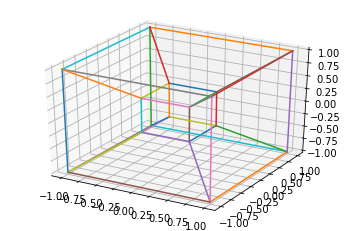

' \n'

In [44]:
import numpy as np 
import math 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sin,cos,tan, pi 
from numpy import matmul 

# Hypercube projected 
points = np.zeros([16,4])
points[0,:] =[-1, -1, -1, 1];
points[1,:] = [1, -1, -1, 1];
points[2,:] = [1, 1, -1, 1];
points[3,:] = [-1, 1, -1, 1];
points[4,:] = [-1, -1, 1, 1];
points[5,:] = [1, -1, 1, 1];
points[6,:] = [1, 1, 1, 1];
points[7,:] = [-1, 1, 1, 1];
points[8,:] = [-1, -1, -1, -1];
points[9,:] = [1, -1, -1, -1];
points[10,:] = [1, 1, -1, -1];
points[11,:] = [-1, 1, -1, -1];
points[12,:] = [-1, -1, 1, -1];
points[13,:] = [1, -1, 1, -1];
points[14,:] = [1, 1, 1, -1];
points[15,:] = [-1, 1, 1, -1];

proj_points = [] 

# Project 
angle = pi/2

for i in range(16):
    rotationXY = np.array([[cos(angle), -sin(angle), 0, 0],[sin(angle), cos(angle), 0, 0],[0, 0, 1, 0],[0, 0, 0, 1]]) 
    rotationZW = np.array([[1, 0, 0, 0],[0, 1, 0, 0],[0, 0, cos(angle), -sin(angle)],[0, 0, sin(angle), cos(angle)]]) 

    rotated1 = matmul(rotationXY,points[i,:])
    rotated2 = matmul(rotationZW, rotated1)

    distance = 2;
    w = 1 / (distance - rotated2[3]);
    projection = np.array([[w, 0, 0, 0],[0, w, 0, 0],[0, 0, w, 0]])
    projected = matmul(projection, rotated2)
    proj_points.append(projected)
    
proj_points = np.array(proj_points) 
proj_points2 = np.reshape(proj_points,(4,4,3))

edges = []
    

for i in range(4):
    for j in range(4): 
        edges.append(proj_points2[j,i,:]); edges.append(proj_points2[j,(i+1)%4,:])
    edges.append(proj_points2[0,i,:]); edges.append(proj_points2[1,i,:])
    edges.append(proj_points2[0,i,:]); edges.append(proj_points2[2,i,:])
    edges.append(proj_points2[1,i,:]); edges.append(proj_points2[3,i,:])
    edges.append(proj_points2[2,i,:]); edges.append(proj_points2[3,i,:])
    

edges = np.array(edges)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, len(edges)-1, 2):
    ax.plot(edges[i:i+2,0], edges[i:i+2,1],edges[i:i+2,2])
    
plt.savefig('Bzvolume1.png')   
plt.show()

''' 
'''

In [3]:
print(proj_points)

[[[ 0.33333333 -0.33333333 -0.33333333]
  [ 0.33333333  0.33333333 -0.33333333]
  [-0.33333333  0.33333333 -0.33333333]
  [-0.33333333 -0.33333333 -0.33333333]]

 [[ 1.         -1.         -1.        ]
  [ 1.          1.         -1.        ]
  [-1.          1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[ 0.33333333 -0.33333333  0.33333333]
  [ 0.33333333  0.33333333  0.33333333]
  [-0.33333333  0.33333333  0.33333333]
  [-0.33333333 -0.33333333  0.33333333]]

 [[ 1.         -1.          1.        ]
  [ 1.          1.          1.        ]
  [-1.          1.          1.        ]
  [-1.         -1.          1.        ]]]


In [ ]:
''' 
for i in range(4):
    edges.append(proj_points[i,:]); edges.append(proj_points[(i+1)%4,:])
    edges.append(proj_points[i+4,:]); edges.append(proj_points[((i+1)%4)+4,:])
    edges.append(proj_points[i,:]); edges.append(proj_points[i+4,:])
    edges.append(proj_points[i+8,:]); edges.append(proj_points[(i+1)%4+8,:])
    edges.append(proj_points[i+4+8,:],); edges.append(proj_points[((i+1)%4)+4+8,:])
    edges.append(proj_points[i+8,:]); edges.append(proj_points[i+4+8,:])

for i in range(8): 
    edges.append(proj_points[i,:]); edges.append(proj_points[i+8,:])

    
edges = np.array(edges)

for i in range(0, len(edges)-1, 2):
    ax.plot(edges[i:i+2,0], edges[i:i+2,1],edges[i:i+2,2])

plt.show()
'''